In [1]:
%matplotlib inline
import pymc as pm
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import metropolis_commands as mc
import numpy as np
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [10, 3]

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


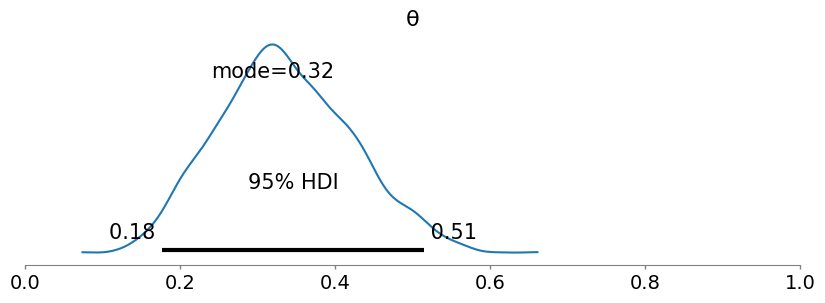

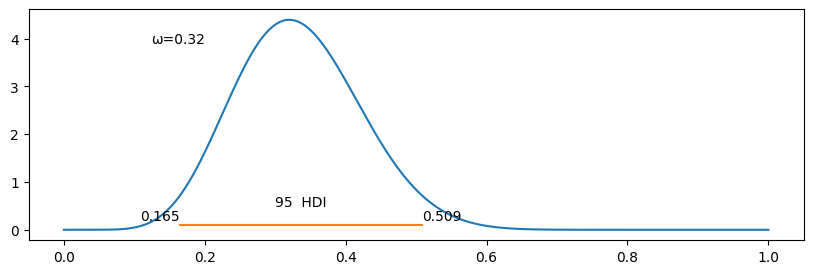

In [2]:
trials = 20
head = 4 

data = np.zeros(trials)
data[np.arange(head)]  = 1

alph = 5
bet = 2

with pm.Model() as our_first_model:
   θ = pm.Beta('θ', alpha=alph, beta=bet)
   y = pm.Bernoulli('y', p=θ, observed=data)
   trace = pm.sample(draws=1000, tune=1000)



az.plot_posterior(trace, hdi_prob=.95, point_estimate="mode")
plt.xlim(0,1)
plt.show()
mc.plot_beta(a=alph+head, b=bet+trials-head) 

In `theta = pm.Beta("theta", alpha=1., beta=1.)` wird die Prior-Verteilung definiert, `y = pm.Bernoulli("y", p=theta, observed=data)` legt die Likelihood-Funktion fest. `trace = pm.sample(draws=10000, tune=1000)` gibt an, dass die ersten 1000 tune-in-Versuche, also die ersten 1000 $\theta$-Werte, die erzeugt wurden, nicht berücksichtigt werden im Histogramm zur Annäherung der Posterior-Verteilung und dass nach den tune-in-Versuchen noch 10000 Schritte ausgeführt werden.
